In [656]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [535]:
np.random.seed(0)

In [536]:
def ACKLEY_FUNCTION(x, a=20, b=0.2, c=2*math.pi) -> float:
  # Number of dimensions.
  d = 2
  return (-a * math.exp(-b * math.sqrt(1/d * np.sum(np.square(x))))
  - math.exp(1/d * np.sum(np.cos(c * x))) + a + math.exp(1))

In [745]:
class Optimizator:
  def __init__(self, function, epochs=100) -> None:
      self.function = function
      self.epochs = epochs
      self.LOWER_BOUND = -32.768
      self.UPPER_BOUND = 32.768
      self.children = dict()
      self.best_history = []

  def evaluate(self, children_to_eval) -> float:
    return self.function(children_to_eval)

  def mutate(self, father):
    ans = father.copy()
    ans[0] += (np.random.uniform(-2, 2) / (2 ** np.random.randint(0, 3)))
    ans[1] += (np.random.uniform(-2, 2) / (2 ** np.random.randint(0, 3)))
    return np.clip(ans, self.LOWER_BOUND, self.UPPER_BOUND)  

In [760]:
class OneFatherManyChildren(Optimizator):
  def __init__(self, function, epochs=100) -> None:
    super().__init__(function, epochs)
    self.best_history = []

  def runOptimization(self, n=10):
    self.father = np.random.uniform(self.LOWER_BOUND, self.UPPER_BOUND, size=(2,))
    for _ in range(self.epochs):
      self.children.clear()
      for _ in range(n):
        new_children = self.mutate(self.father)
        self.children[tuple(new_children)] = self.evaluate(new_children)
      self.father = np.array(min(self.children, key=self.children.get)).copy()
      self.best_history.append(self.father.copy())
    return self.father, self.best_history

class OneFatherManyChildrenGenerational(Optimizator):
  def __init__(self, function, epochs=100) -> None:
    super().__init__(function, epochs)
    self.best_history = []

  def runOptimization(self, n=10):
    self.father = np.random.uniform(self.LOWER_BOUND, self.UPPER_BOUND, size=(2,))
    for _ in range(self.epochs):
      self.children.clear()
      for _ in range(n):
        new_children = self.mutate(self.father)
        self.children[tuple(new_children)] = self.evaluate(new_children)
      best_children = np.array(min(self.children, key=self.children.get)).copy()
      self.father = best_children.copy() if self.evaluate(best_children) < self.evaluate(self.father) else self.father.copy()
      self.best_history.append(self.father.copy())
    return self.father, self.best_history 

class ManyFatherManyChildren(Optimizator):
  def __init__(self, function, epochs=100) -> None:
    super().__init__(function, epochs)
    self.best_history = []

  def runOptimization(self, n=5, m=10):
    self.fathers = [np.random.uniform(self.LOWER_BOUND, self.UPPER_BOUND, size=(2,)) for _ in range(n)]
    for _ in range(self.epochs):
      self.children.clear()
      for _ in range(m):
        new_children = self.mutate(self.fathers[np.random.randint(0, n)])
        self.children[tuple(new_children)] = self.evaluate(new_children)
      self.fathers = np.array(list(dict(sorted(self.children.items(), key=lambda x: x[1])[:n]).keys())).copy()
      self.best_father = np.array(min(self.fathers, key=self.evaluate)).copy()
      self.best_history.append(self.best_father.copy())
    return self.best_father, self.best_history

class ManyFatherManyChildrenGenerational(Optimizator):
  def __init__(self, function, epochs=100) -> None:
    super().__init__(function, epochs)
    self.best_history = []

  def runOptimization(self, n=5, m=10):
    self.fathers = [np.random.uniform(self.LOWER_BOUND, self.UPPER_BOUND, size=(2,)) for _ in range(n)]
    for _ in range(self.epochs):
      self.children.clear()
      for _ in range(m):
        new_children = self.mutate(self.fathers[np.random.randint(0, n)])
        self.children[tuple(new_children)] = self.evaluate(new_children)
      for father in self.fathers:
        self.children[tuple(father)] = self.evaluate(father)
      self.fathers = np.array(list(dict(sorted(self.children.items(), key=lambda x: x[1])[:n]).keys())).copy()
      self.best_father = np.array(min(self.fathers, key=self.evaluate)).copy()
      self.best_history.append(self.best_father.copy())
    return self.best_father, self.best_history

In [737]:
def plot_curve(evaluated):
  plt.figure(figsize=(16, 16))
  plt.title('Best children for each epoch in optimization algorithm')
  plt.xlabel('Iteration', fontsize=18)
  plt.ylabel('Value of Ackley function', fontsize=16)
  plt.plot(evaluated)
  plt.show()

In [731]:
def do_plot_2d_map(coordinates, technique) -> list():
  evaluated = [ACKLEY_FUNCTION(element) for element in coordinates]
  x, y = coordinates.T
  plt.figure(figsize=(16, 16))
  plt.scatter(x, y, c=evaluated, s=1)
  plt.xlabel('X axis', fontsize=18)
  plt.ylabel('Y axis', fontsize=16)
  plt.title('Results for Ackley function using {}'.format(technique))
  plt.show()
  return evaluated

In [751]:
optimization_algorithm_ofmc = OneFatherManyChildren(ACKLEY_FUNCTION, epochs=2000)
best, coordinates = optimization_algorithm_ofmc.runOptimization()
print("Best values for x using one father many children:", best)

Best values for x using one father many children: [0.06570428 0.79496492]


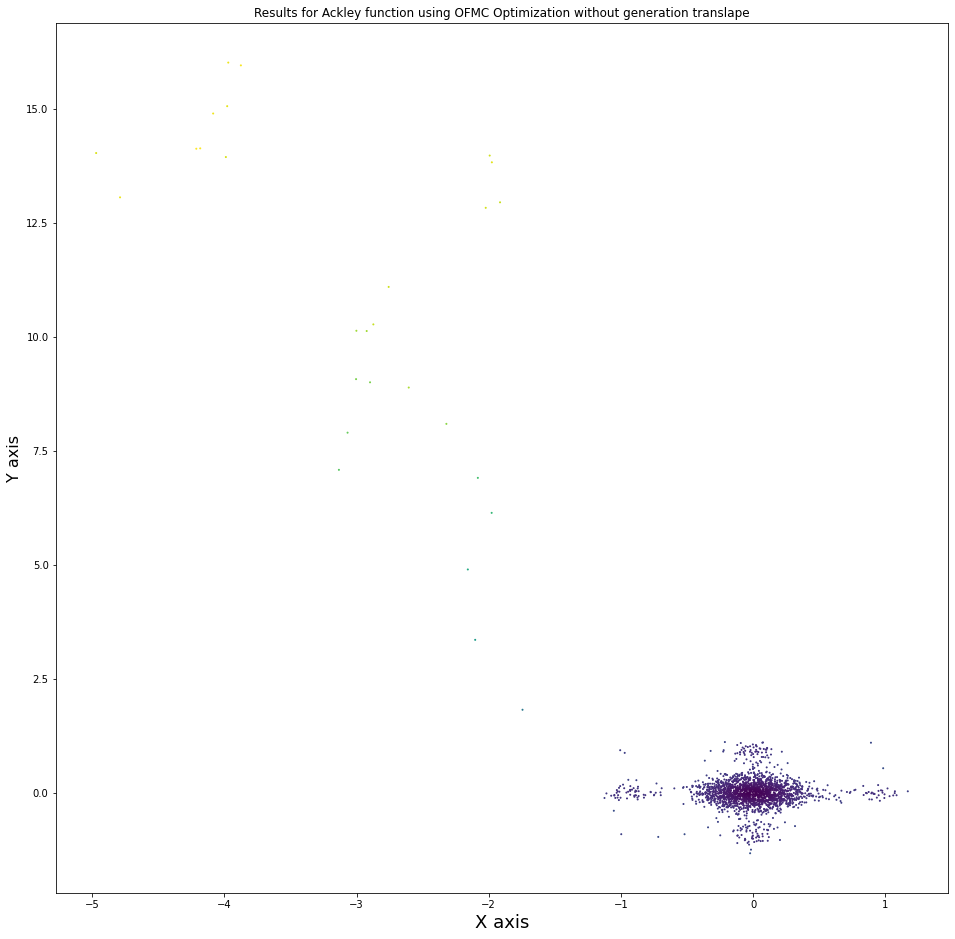

In [752]:
coordinates = np.asarray(coordinates)
evaluated = do_plot_2d_map(coordinates, 'OFMC Optimization without generation translape')

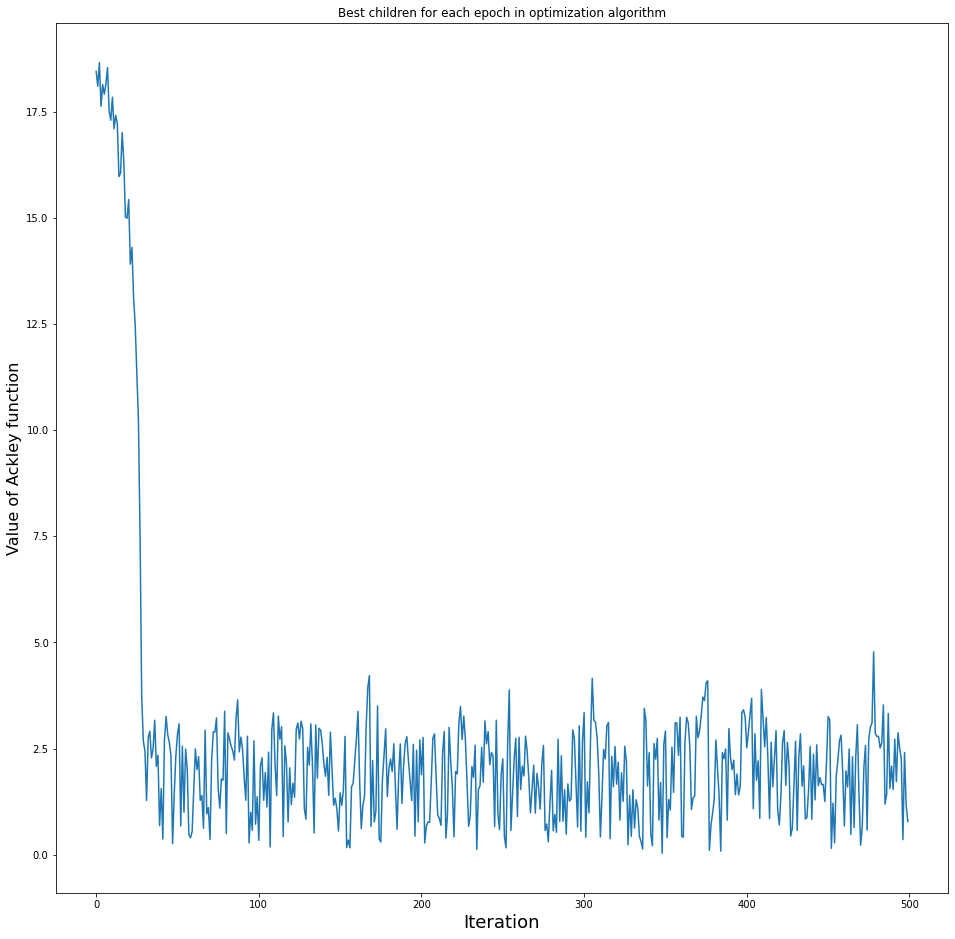

In [753]:
plot_curve(evaluated[:500])

In [748]:
optimization_algorithm_ofmcg = OneFatherManyChildrenGenerational(ACKLEY_FUNCTION, epochs=2000)
best, coordinates = optimization_algorithm_ofmcg.runOptimization()
print("Best values for x using one father many children with generation translape:", best)

father bef bef [13.76256162 -0.5445411 ] 19.223343615442854
father bef [13.76256162 -0.5445411 ] 19.223343615442854
father af [15.03243241 -1.02008477] 17.663798365983236
father af af [15.03243241 -1.02008477] 17.663798365983236
father bef bef [15.03243241 -1.02008477] 17.663798365983236
father bef [15.03243241 -1.02008477] 17.663798365983236
father af [15.03243241 -1.02008477] 17.663798365983236
father af af [15.03243241 -1.02008477] 17.663798365983236
father bef bef [15.03243241 -1.02008477] 17.663798365983236
father bef [15.03243241 -1.02008477] 17.663798365983236
father af [15.03243241 -1.02008477] 17.663798365983236
father af af [15.03243241 -1.02008477] 17.663798365983236
father bef bef [15.03243241 -1.02008477] 17.663798365983236
father bef [15.03243241 -1.02008477] 17.663798365983236
father af [15.03243241 -1.02008477] 17.663798365983236
father af af [15.03243241 -1.02008477] 17.663798365983236
father bef bef [15.03243241 -1.02008477] 17.663798365983236
father bef [15.03243241 

[array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477]), array([15.03243241, -1.02008477])]


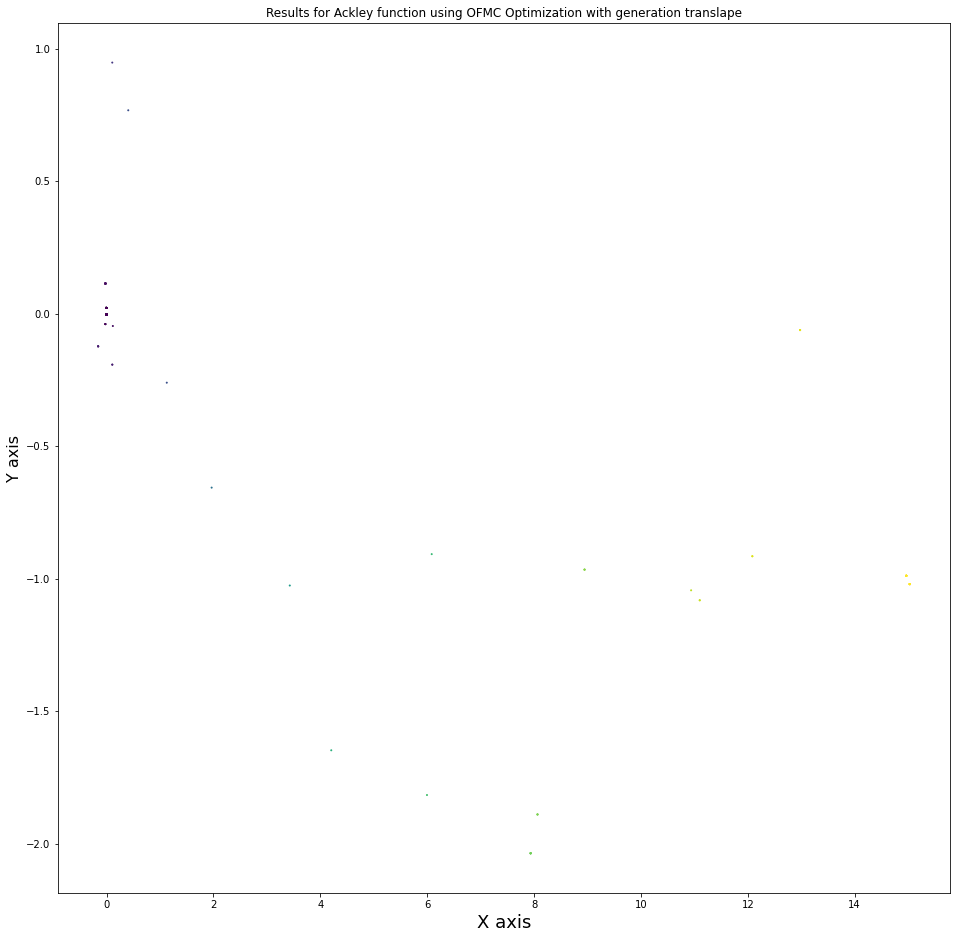

In [749]:
coordinates = np.asarray(coordinates)
evaluated = do_plot_2d_map(coordinates, 'OFMC Optimization with generation translape')

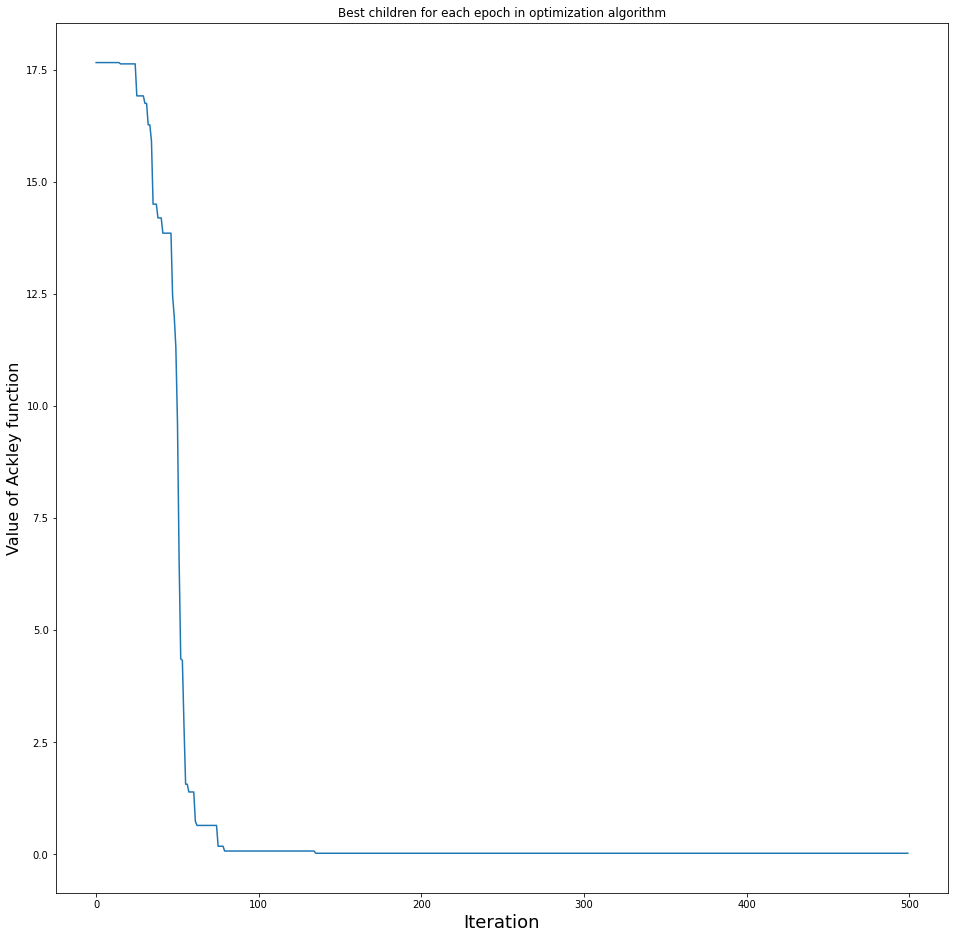

In [750]:
plot_curve(evaluated[:500])

In [754]:
optimization_algorithm_mfmc = ManyFatherManyChildren(ACKLEY_FUNCTION, epochs=2000)
best, coordinates = optimization_algorithm_mfmc.runOptimization()
print("Best values for x using many father many children without generation translape:", best)

Best values for x using many father many children without generation translape: [ 0.05708622 -0.89169078]


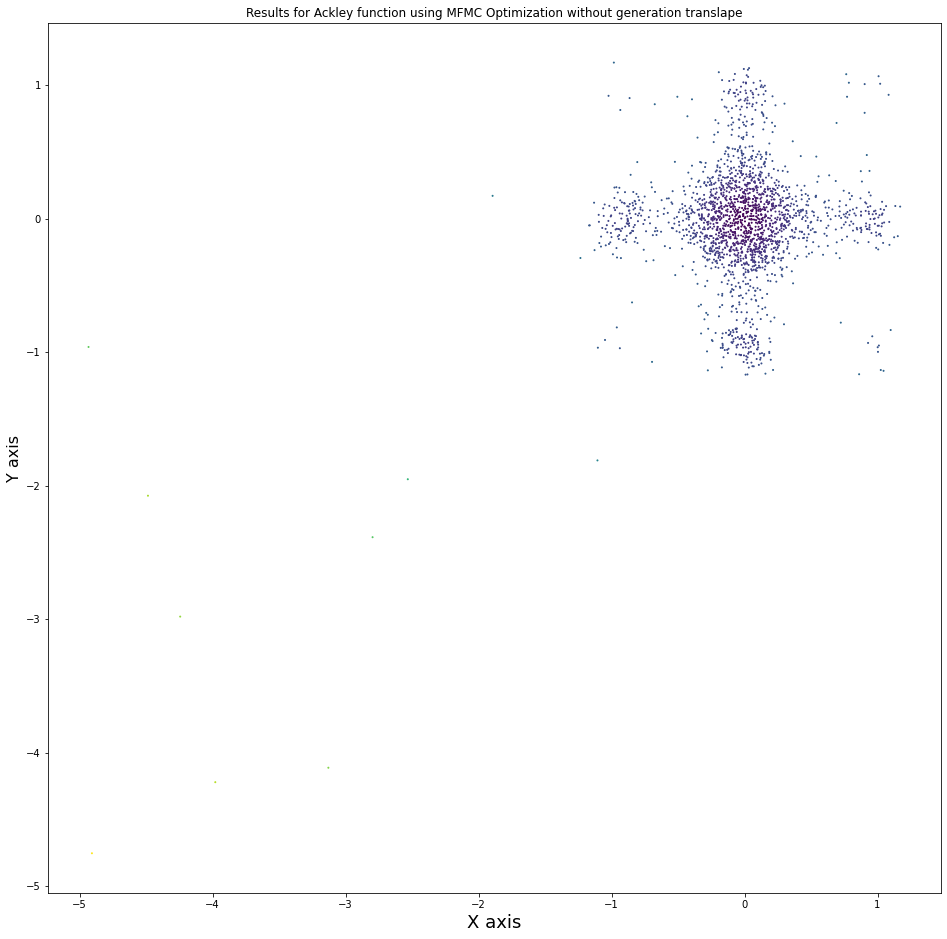

In [755]:
coordinates = np.asarray(coordinates)
evaluated = do_plot_2d_map(coordinates, 'MFMC Optimization without generation translape')

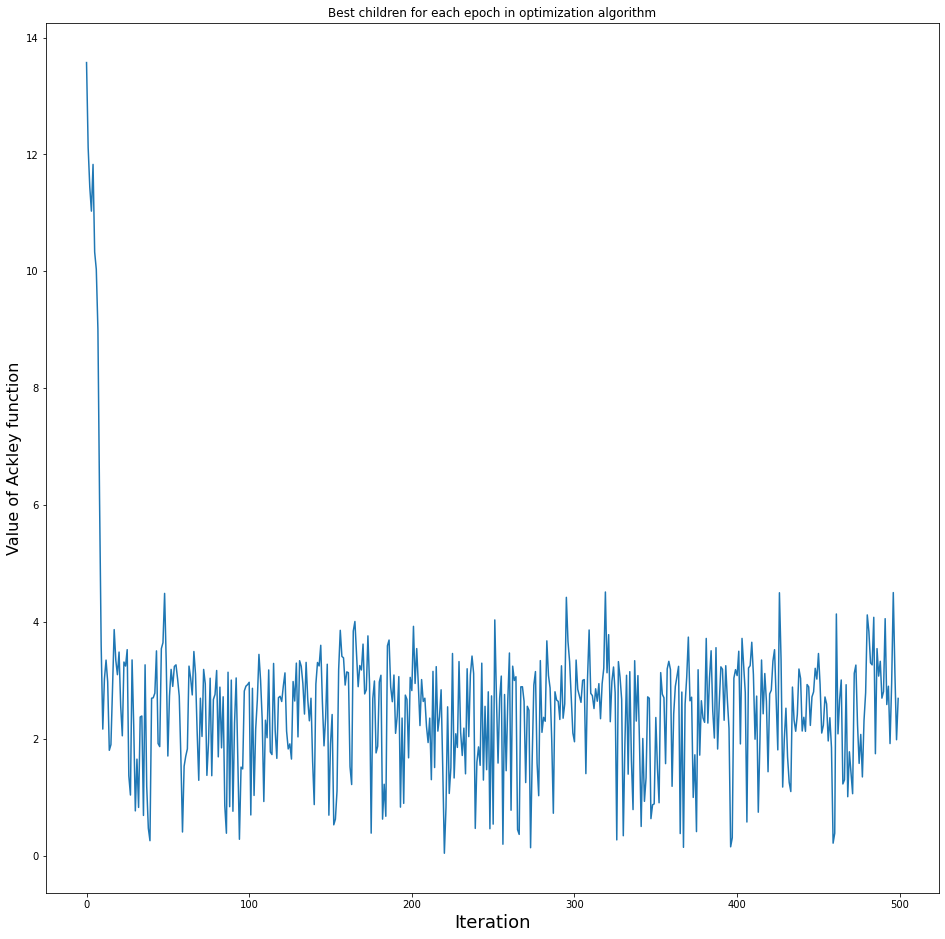

In [756]:
plot_curve(evaluated[:500])

In [757]:
optimization_algorithm_mfmcg = ManyFatherManyChildrenGenerational(ACKLEY_FUNCTION, epochs=2000)
best, coordinates  = optimization_algorithm_mfmcg.runOptimization()
print("Best values for x using many father many children with generation translape:", best)

Best values for x using many father many children with generation translape: [-1.04496507e-02  2.46621678e-06]


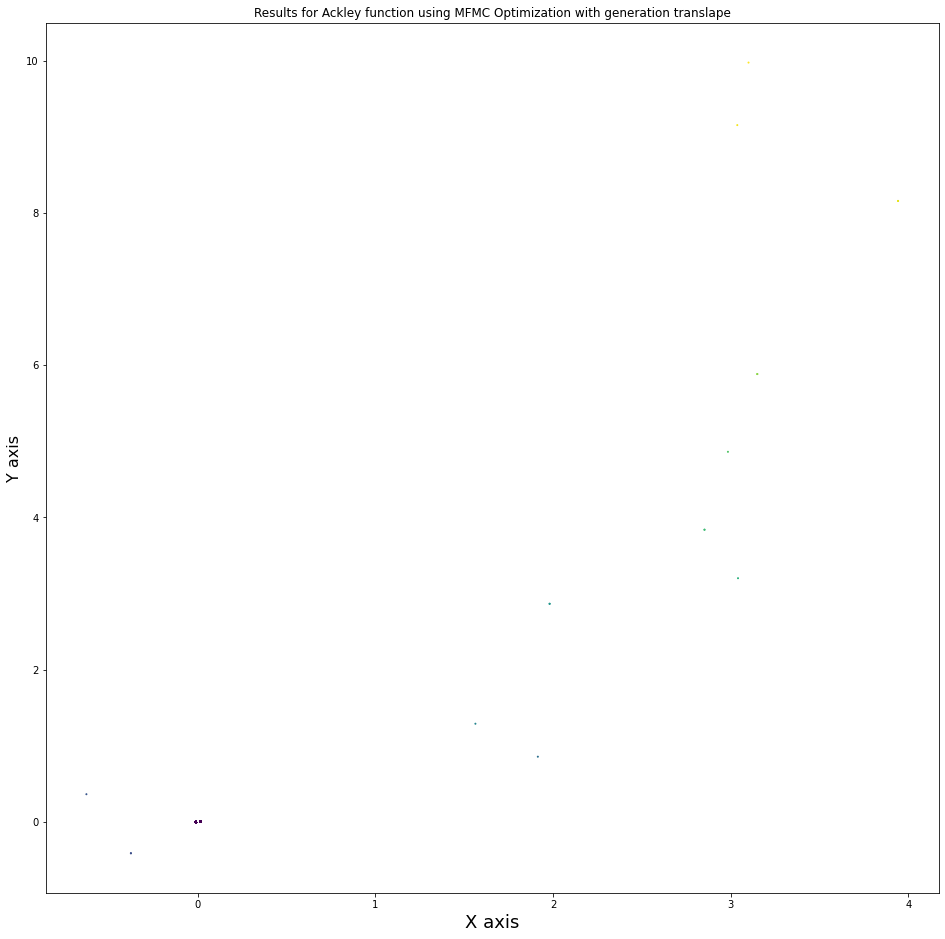

In [758]:
coordinates = np.asarray(coordinates)
evaluated = do_plot_2d_map(coordinates, 'MFMC Optimization with generation translape')

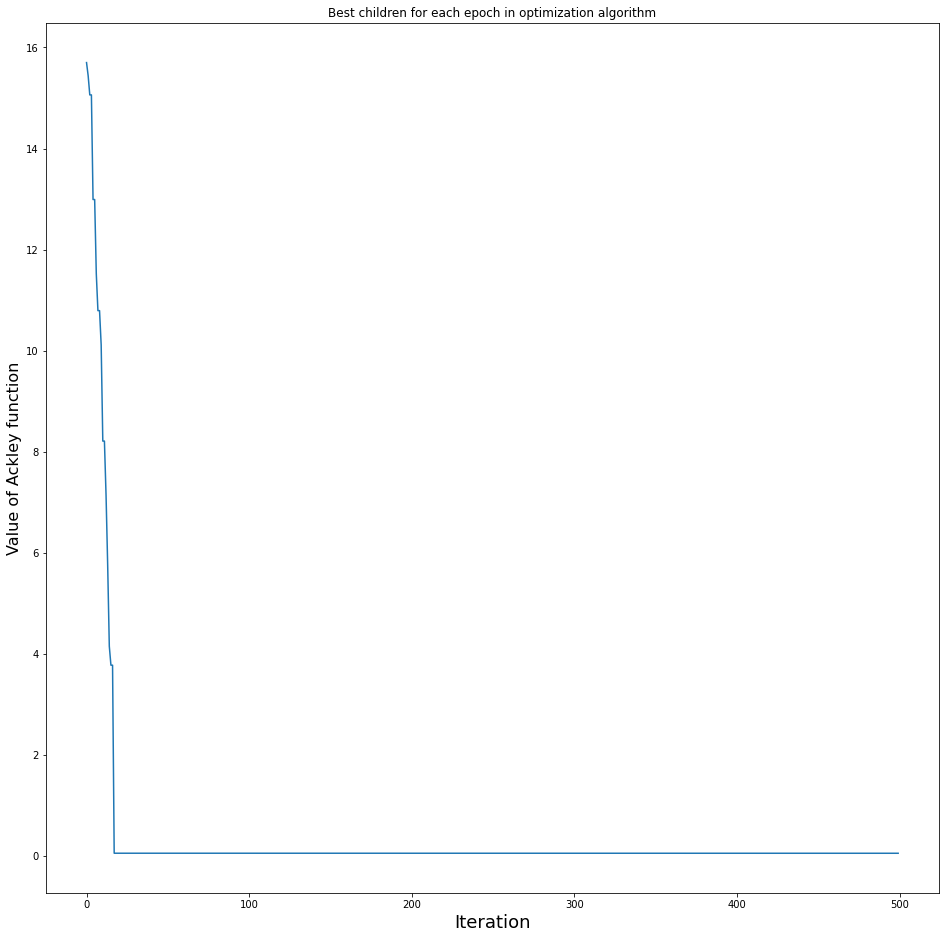

In [759]:
plot_curve(evaluated[:500])